<h1><strong>House Price Prediction</strong></h1>

In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as skl

In [715]:
Dataframe_path = "database/csv3.csv"
data = pd.read_csv(Dataframe_path)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<strong>Checking for Nan Values</strong>

In [716]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<strong>Droping the Nan Values</strong>

In [717]:
data.dropna(inplace=True)

<strong>Spliting the train and test data</strong>

In [718]:
from sklearn.model_selection import train_test_split

if(Dataframe_path == "database/csv3.csv"):
    X = data.drop(['median_house_value'], axis=1)
    Y = data['median_house_value']
elif(Dataframe_path == "database/csv2.csv"):
    X = data.drop(['Price'], axis=1)
    Y = data['Price']

X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [719]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

<strong>Analising Basic Correlation</strong>

In [720]:
train_data = X_train.join(Y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10763,-117.90,33.63,26.0,4486.0,554.0,1598.0,549.0,10.1454,<1H OCEAN,500001.0
11714,-120.15,39.20,14.0,1382.0,242.0,141.0,66.0,4.1016,INLAND,283300.0
19431,-121.05,37.65,5.0,3096.0,545.0,1760.0,519.0,4.5701,INLAND,146400.0
9480,-123.36,39.40,21.0,1081.0,254.0,715.0,275.0,1.5625,<1H OCEAN,71500.0
14114,-117.11,32.74,33.0,1126.0,267.0,621.0,241.0,3.2422,NEAR OCEAN,123100.0


In [721]:
if(Dataframe_path == "database/csv3.csv"):
    train_data.ocean_proximity.value_counts()
elif(Dataframe_path == "database/csv2.csv"):
    train_data.Suburb.value_counts()

In [722]:
if(Dataframe_path == "database/csv3.csv"):
    pd.get_dummies(train_data.ocean_proximity)
elif(Dataframe_path == "database/csv2.csv"):
    pd.get_dummies(train_data.Suburb)

<strong>Checking the Distribution between the feature colomns</strong>

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

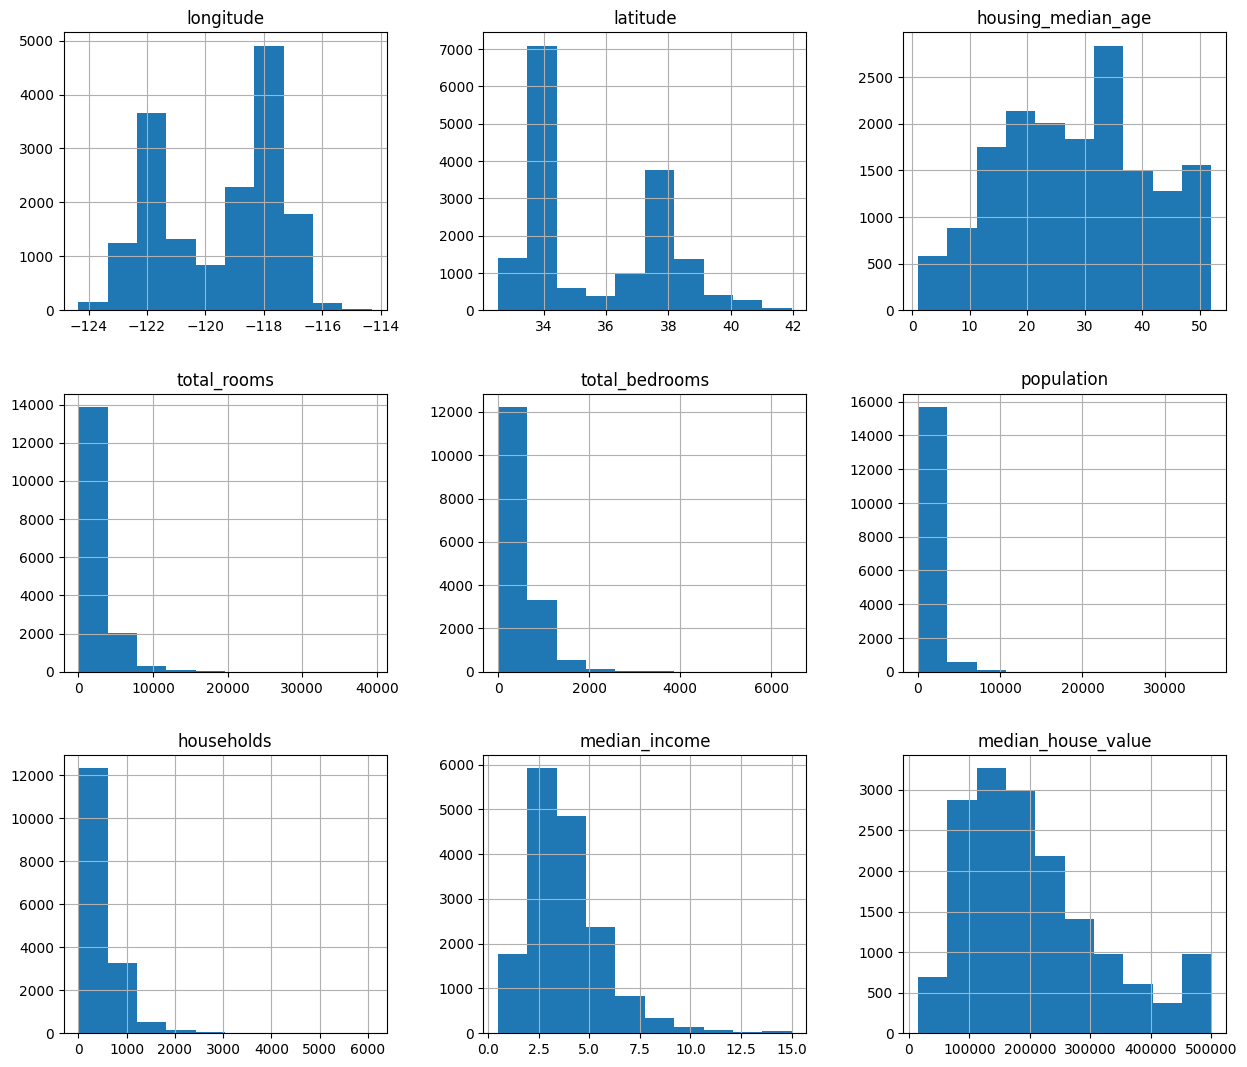

In [723]:
train_data.hist(figsize=(15, 13))

<strong>Excluding Non-numerical values before proceeding</strong>

In [724]:
numeric_columns = train_data.select_dtypes(include=['number']).columns
numeric_train_data = train_data[numeric_columns]

#correlation on numeric data
correlation_matrix = numeric_train_data.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925606,-0.118608,0.049336,0.074595,0.103923,0.061755,-0.016505,-0.047400
latitude,-0.925606,1.000000,0.020637,-0.037883,-0.069791,-0.109603,-0.073901,-0.078638,-0.142425
housing_median_age,-0.118608,0.020637,1.000000,-0.359338,-0.318989,-0.294034,-0.301439,-0.122117,0.108421
total_rooms,0.049336,-0.037883,-0.359338,1.000000,0.931274,0.858384,0.920167,0.193942,0.128724
total_bedrooms,0.074595,-0.069791,-0.318989,0.931274,1.000000,0.880041,0.980802,-0.008471,0.049022
population,0.103923,-0.109603,-0.294034,0.858384,0.880041,1.000000,0.908341,0.001392,-0.027659
households,0.061755,-0.073901,-0.301439,0.920167,0.980802,0.908341,1.000000,0.011668,0.063082
median_income,-0.016505,-0.078638,-0.122117,0.193942,-0.008471,0.001392,0.011668,1.000000,0.689417
median_house_value,-0.047400,-0.142425,0.108421,0.128724,0.049022,-0.027659,0.063082,0.689417,1.000000


<strong>Building Correlation matix Heatmap</strong>

<Axes: >

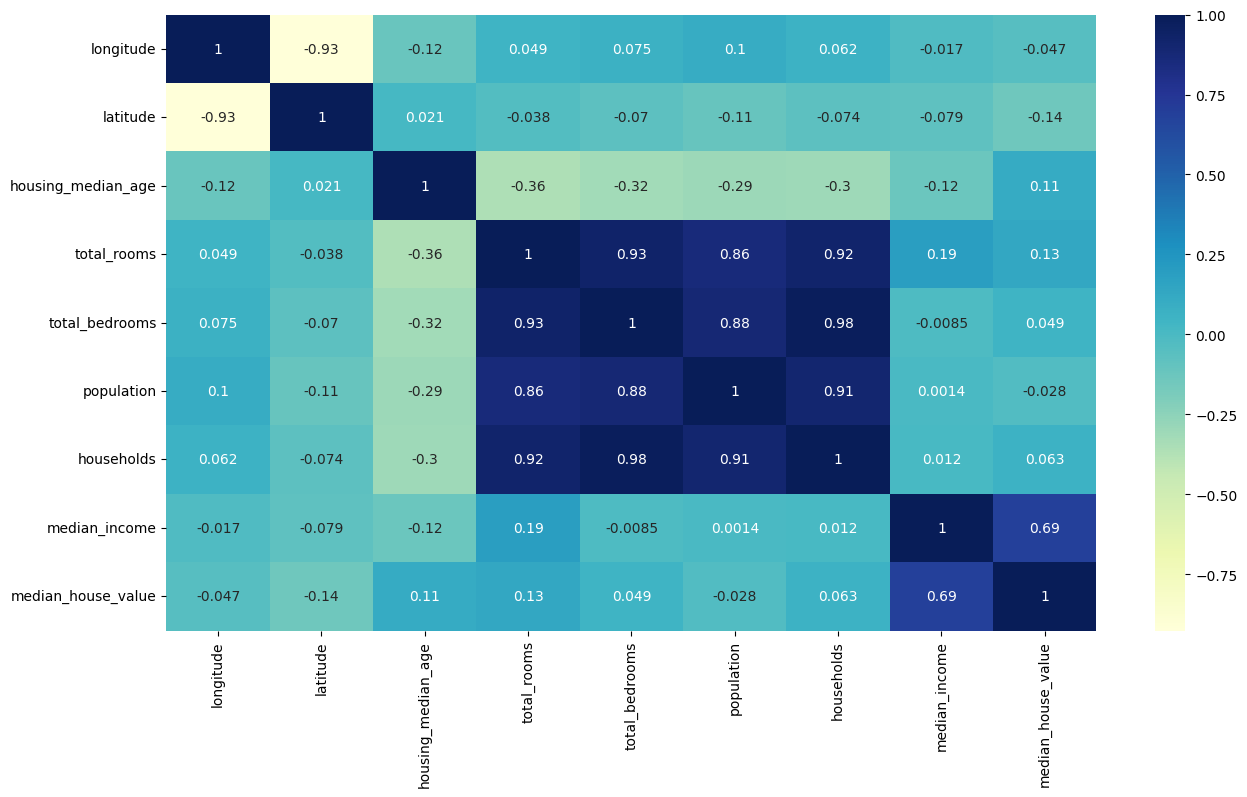

In [725]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

<h1><strong>Model Devolopment - Linear Regressor Model</strong></h1>

In [726]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = train_data.select_dtypes(include=['number']).columns
numeric_train_data = train_data[numeric_columns]

if(Dataframe_path == "database/csv3.csv"):
    x_train, y_train = numeric_train_data.drop(['median_house_value'], axis=1), numeric_train_data['median_house_value']
elif(Dataframe_path == "database/csv2.csv"):
    x_train, y_train = numeric_train_data.drop(['Price'], axis=1), numeric_train_data['Price']

x_train_s = scaler.fit_transform(x_train)

regressor = LinearRegression()
regressor.fit(x_train_s, y_train)

LinearRegression()

In [727]:
test_data = X_test.join(Y_test)

numeric_columns = test_data.select_dtypes(include=['number']).columns
numeric_test_data = test_data[numeric_columns]

if(Dataframe_path == "database/csv3.csv"):
    X_test, Y_test = numeric_test_data.drop(['median_house_value'], axis=1), numeric_test_data['median_house_value']

elif(Dataframe_path == "database/csv2.csv"):
    X_test, Y_test = numeric_test_data.drop(['Price'], axis=1), numeric_test_data['Price']

test_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14499,-117.23,32.86,15.0,1199.0,301.0,510.0,296.0,3.6083,NEAR OCEAN,180100.0
15048,-116.95,32.77,25.0,3308.0,421.0,1201.0,414.0,6.3191,<1H OCEAN,303400.0
10800,-117.94,33.62,28.0,1765.0,390.0,832.0,349.0,6.5928,<1H OCEAN,439100.0
4694,-118.37,34.07,52.0,2195.0,435.0,884.0,432.0,5.2400,<1H OCEAN,486400.0
15381,-117.19,33.41,16.0,3031.0,554.0,1301.0,518.0,4.0882,<1H OCEAN,296100.0


In [728]:
X_test_s = scaler.transform(X_test)

In [729]:
predictions = regressor.predict(X_test_s)
predictions

regressor.score(X_test_s, Y_test)

0.6202142478354826

<strong>Ploting Prediction</strong>

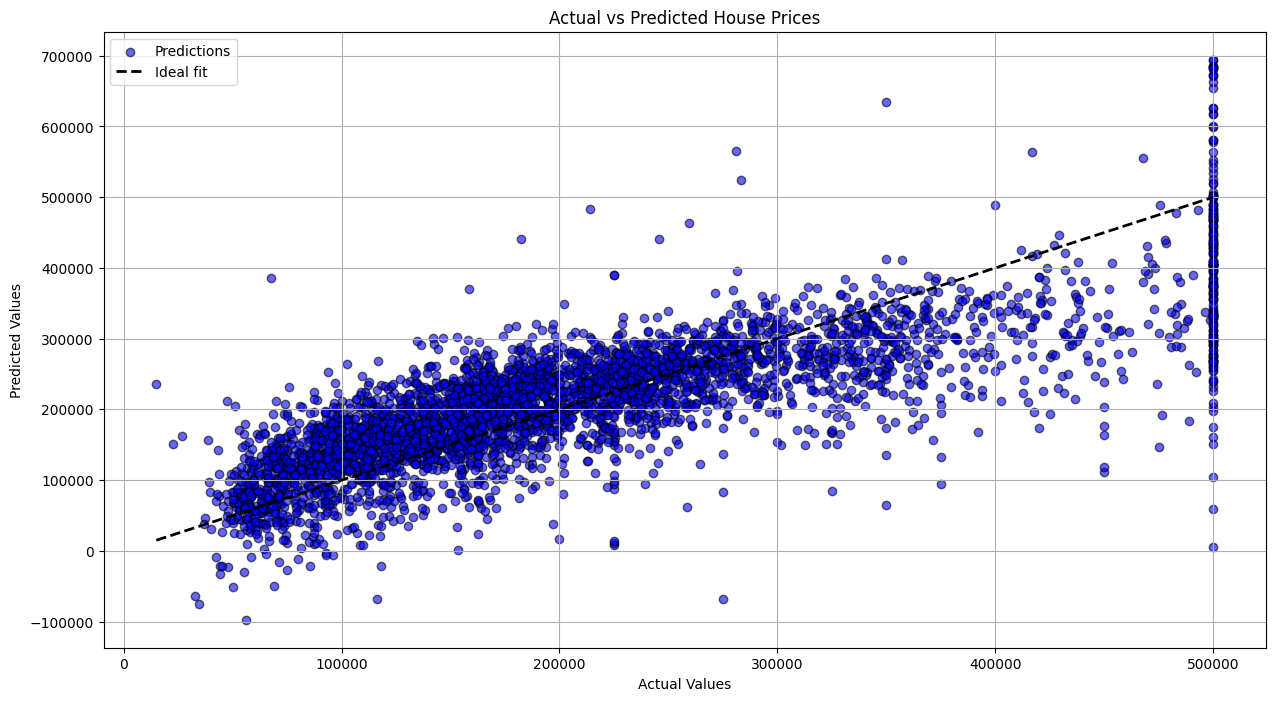

In [730]:
plt.figure(figsize=(15, 8))
plt.scatter(Y_test, predictions, color='blue', edgecolor='k', alpha=0.6, label='Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

<h1><strong>Model Devolopment - Random Forest Regressor</strong></h1>

In [731]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor()

forest_regressor.fit(x_train_s, y_train)

RandomForestRegressor()

In [732]:
forest_regressor.score(X_test_s, Y_test)

0.8160724110409414

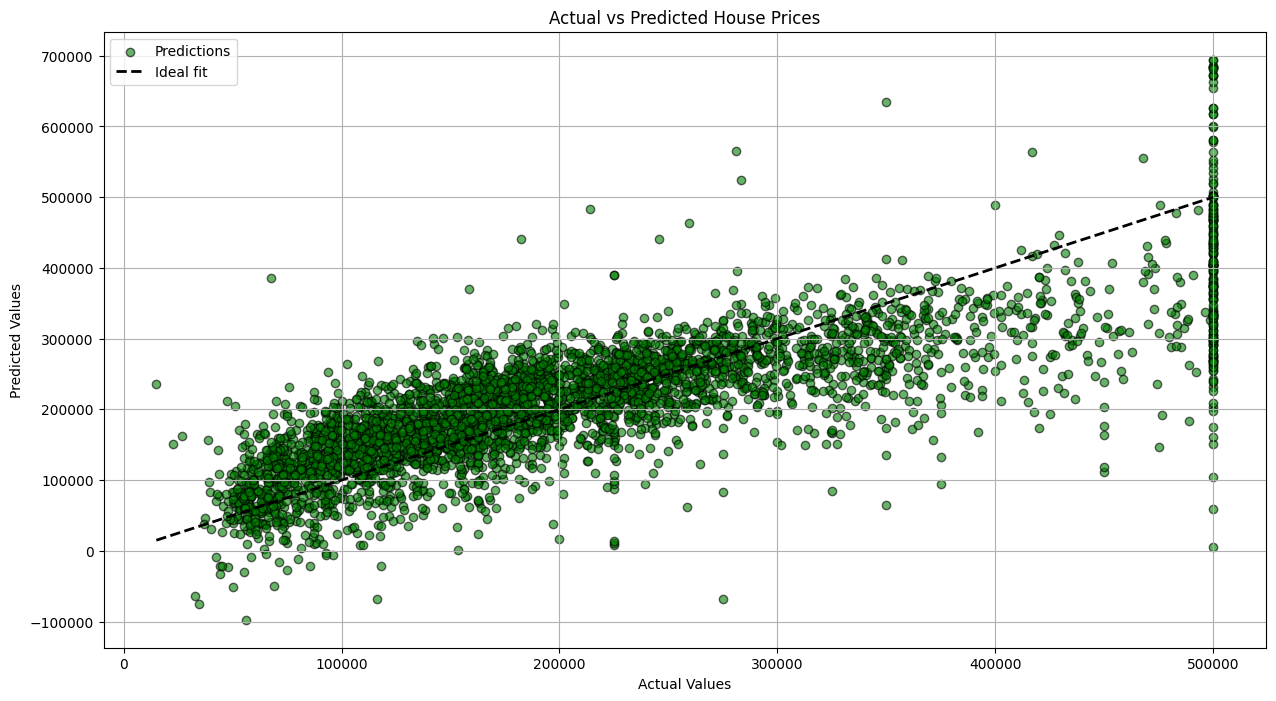

In [733]:
prediction_forest_regressor = forest_regressor.predict(X_test_s)

plt.figure(figsize=(15, 8))
plt.scatter(Y_test, predictions, color='green', edgecolor='k', alpha=0.6, label='Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

<strong>Grid Search Cross Validation for more model Accuracy</strong>

In [734]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest_regressor, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [735]:
best_forest_regressor = grid_search.best_estimator_
best_forest_regressor

RandomForestRegressor(max_features=6, n_estimators=30)

In [736]:
best_forest_regressor.score(X_test_s, Y_test)

0.8118885181757737

<h1><strong>How Different Aspects Affects House Prices - Clustering Model</strong></h1>

In [781]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

<strong>Getting the already preprocessed Data</strong>

In [782]:
new_data = pd.read_csv(Dataframe_path)
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<strong>Ploting Scatter Plot Chart</strong>

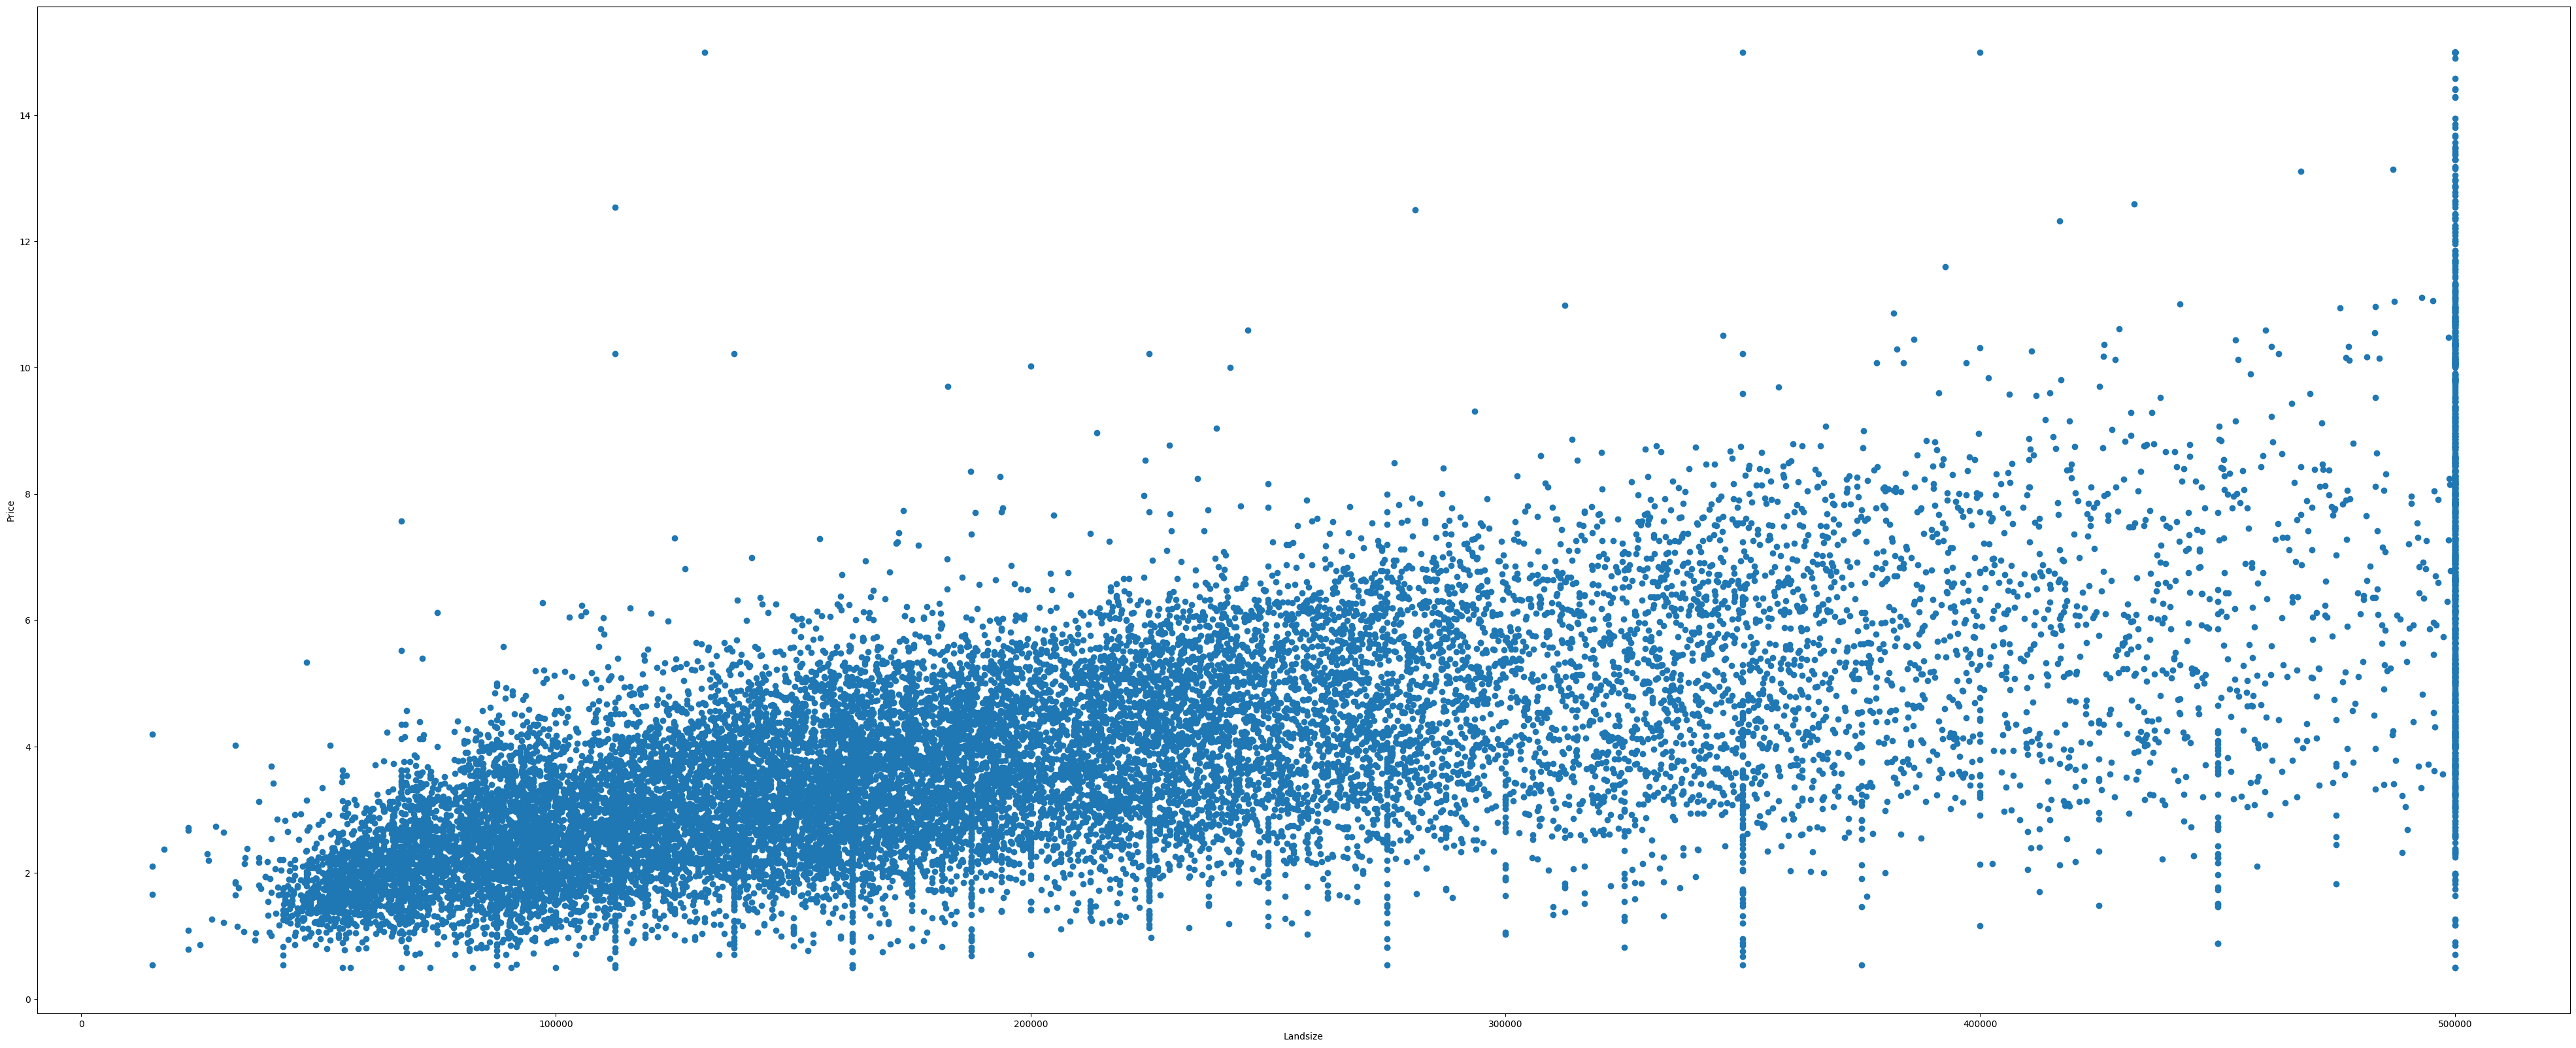

In [783]:
if(Dataframe_path == "database/csv3.csv"):
    plt.figure(figsize=(50, 20))
    plt.scatter(new_data['median_house_value'], new_data['median_income'])
    plt.xlabel("Landsize")
    plt.ylabel("Price")
elif(Dataframe_path == "database/csv2.csv"):
    plt.figure(figsize=(50, 20))
    plt.scatter(new_data['Price'], new_data['BuildingArea'])
    plt.xlabel("Landsize")
    plt.ylabel("Price")

In [784]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [785]:
if(Dataframe_path == "database/csv3.csv"):
    y_predicted =  km.fit_predict(new_data[['median_house_value', 'median_income']])
elif(Dataframe_path == "database/csv2.csv"):
    y_predicted =  km.fit_predict(new_data[['BuildingArea', 'Price']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [786]:
new_data['cluster'] = y_predicted
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


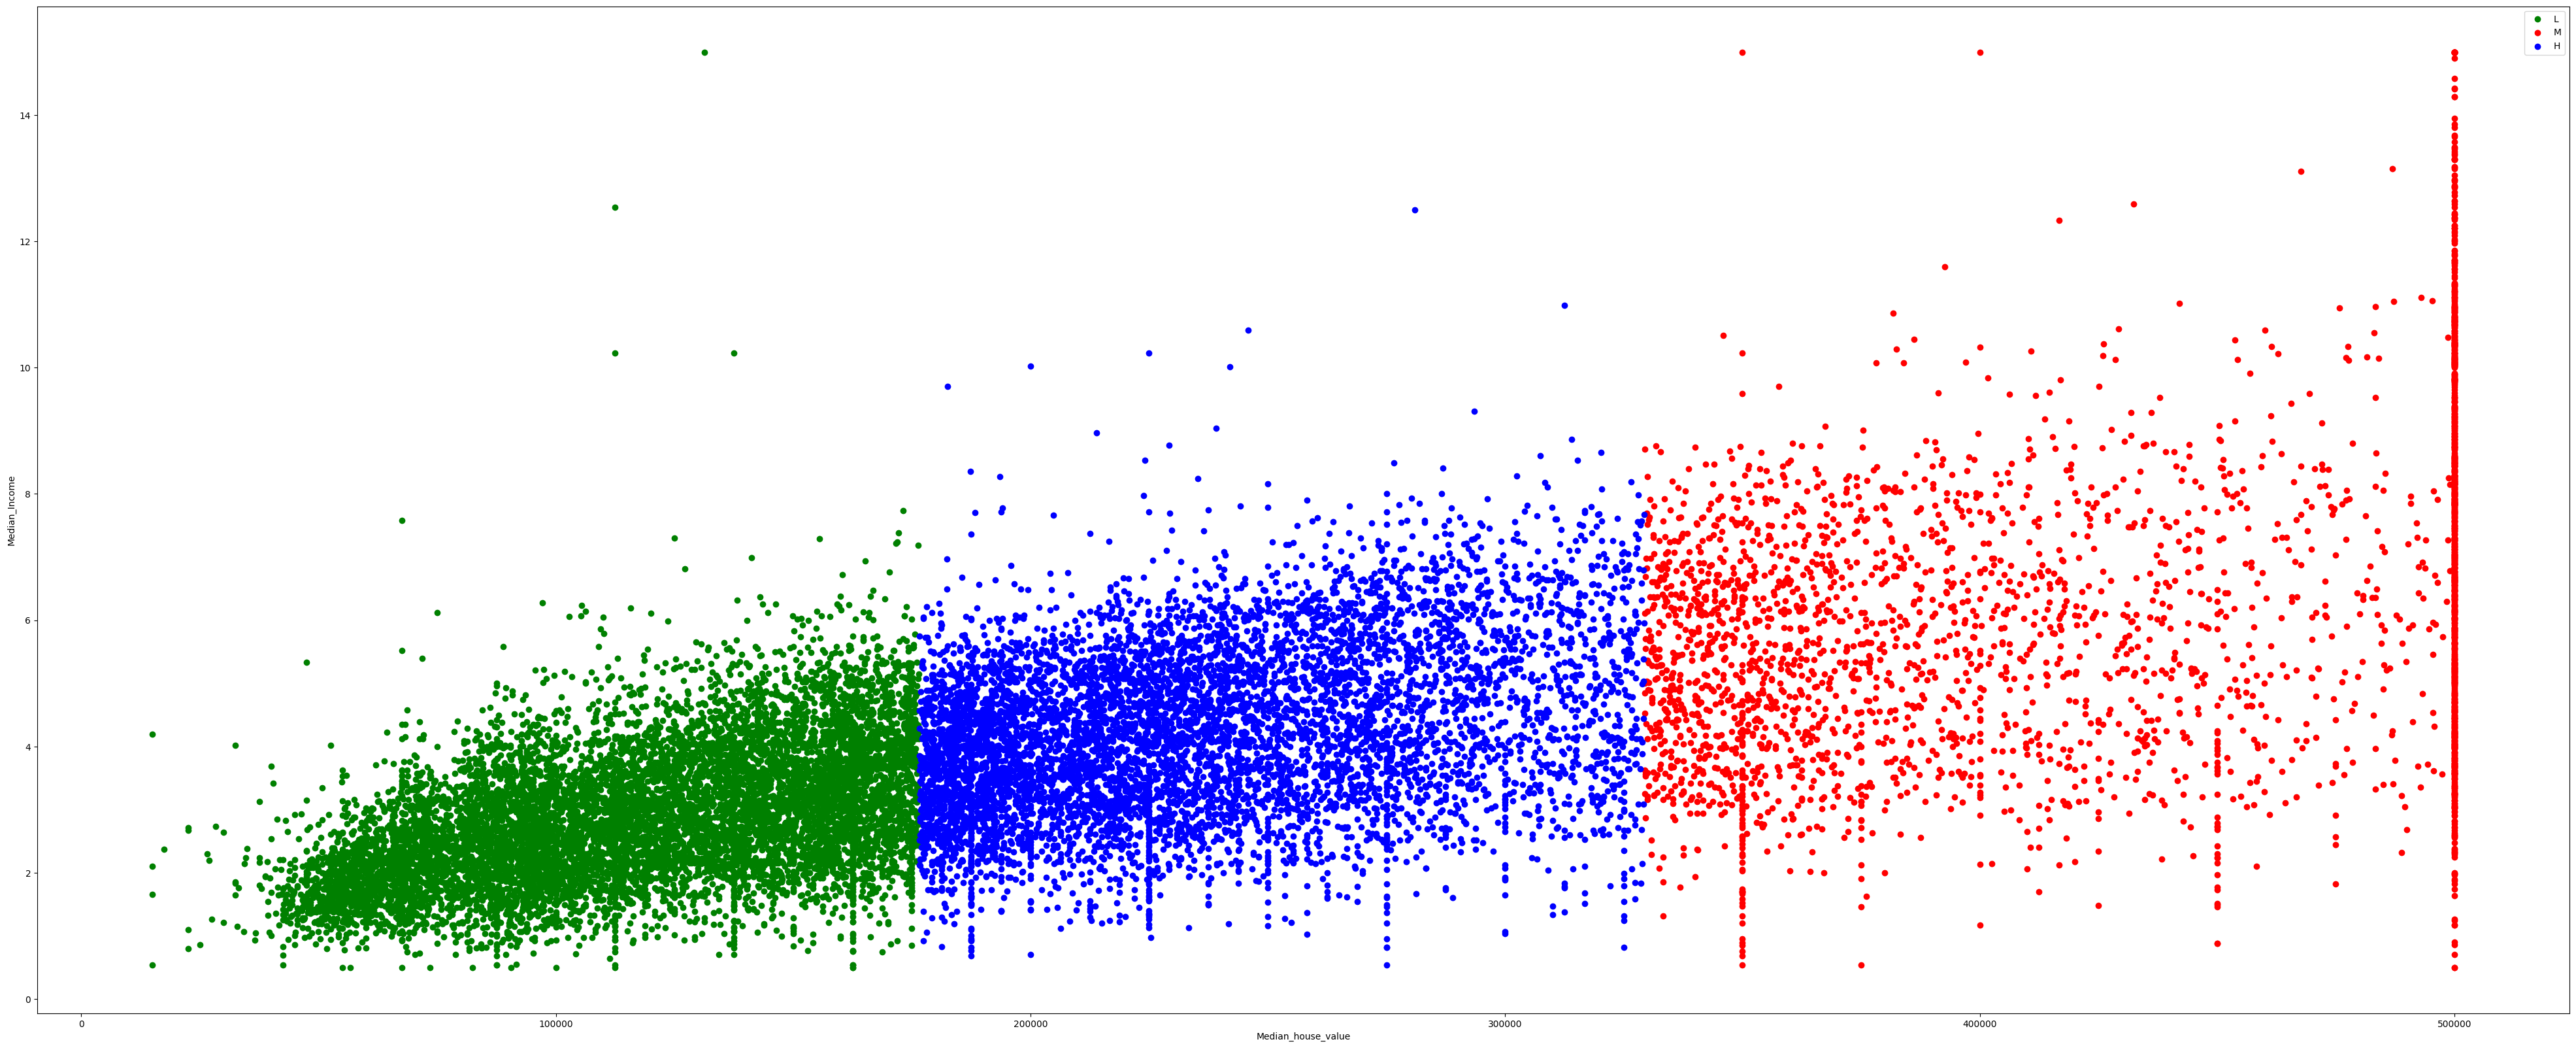

In [787]:
dataframe_1 = new_data[new_data.cluster == 0]
dataframe_2 = new_data[new_data.cluster == 1]
dataframe_3 = new_data[new_data.cluster == 2]

if(Dataframe_path == "database/csv3.csv"):
    plt.figure(figsize= (50, 20))
    plt.scatter(dataframe_1.median_house_value, dataframe_1['median_income'], color='green')
    plt.scatter(dataframe_2.median_house_value, dataframe_2['median_income'], color='red')
    plt.scatter(dataframe_3.median_house_value, dataframe_3['median_income'], color='blue')
    plt.xlabel("Median_house_value")
    plt.ylabel("Median_Income")
    plt.legend("LMH")
elif(Dataframe_path == "database/csv2.csv"):
    plt.figure(figsize= (50, 20))
    plt.scatter(dataframe_1.Price, dataframe_1['BuildingArea'], color='green')
    plt.scatter(dataframe_2.Price, dataframe_2['BuildingArea'], color='red')
    plt.scatter(dataframe_3.Price, dataframe_3['BuildingArea'], color='blue')
    plt.xlabel("Landsize")
    plt.ylabel("Price")
    plt.legend("Price")

<strong>Data Processing anf Scalling (MinMaxScaler)</strong>

In [772]:
minmaxscaler = MinMaxScaler()
if(Dataframe_path == "database/csv3.csv"):
    minmaxscaler.fit(new_data[['median_house_value']])
    new_data['median_house_value'] = minmaxscaler.transform(new_data['median_house_value'].values.reshape(-1, 1))
elif(Dataframe_path == "database/csv2.csv"):
    minmaxscaler.fit(new_data[['Price']])
    new_data['Price'] = minmaxscaler.transform(new_data['Price'].values.reshape(-1, 1))
    # new_data['Price'] = minmaxscaler.transform(new_data[['Price']]) Also works if passed as a dataframe
new_data.head()

d:\Swinburne\Year 2 - Sem 2\Computing Design Innovation Project\Project ENV\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster,scaled_cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,0.539668,0.902266,NEAR BAY,1,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,0.538027,0.708247,NEAR BAY,1,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,0.466028,0.695051,NEAR BAY,1,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,0.354699,0.672783,NEAR BAY,1,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,0.230776,0.674638,NEAR BAY,2,0


In [773]:
if(Dataframe_path == "database/csv3.csv"):
    minmaxscaler.fit(new_data[['median_income']])
    new_data['median_income'] = minmaxscaler.transform(new_data['median_income'].values.reshape(-1, 1))
elif(Dataframe_path == "database/csv2.csv"):
    minmaxscaler.fit(new_data[['BuildingArea']])
    new_data['BuildingArea'] = minmaxscaler.transform(new_data['BuildingArea'].values.reshape(-1, 1))
new_data.head()

d:\Swinburne\Year 2 - Sem 2\Computing Design Innovation Project\Project ENV\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster,scaled_cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,0.539668,0.902266,NEAR BAY,1,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,0.538027,0.708247,NEAR BAY,1,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,0.466028,0.695051,NEAR BAY,1,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,0.354699,0.672783,NEAR BAY,1,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,0.230776,0.674638,NEAR BAY,2,0


In [774]:
km = KMeans(n_clusters=3)
if(Dataframe_path == "database/csv3.csv"):
    y_predicted = km.fit_predict(new_data[['median_house_value', 'median_income']])
elif(Dataframe_path == "database/csv2.csv"):
    y_predicted = km.fit_predict(new_data[['Price', 'BuildingArea']])
y_predicted

array([1, 1, 1, ..., 2, 2, 2])

In [775]:
new_data['scaled_cluster'] = y_predicted
new_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster,scaled_cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,0.539668,0.902266,NEAR BAY,1,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,0.538027,0.708247,NEAR BAY,1,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,0.466028,0.695051,NEAR BAY,1,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,0.354699,0.672783,NEAR BAY,1,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,0.230776,0.674638,NEAR BAY,2,0


<strong>Finding Cluster Centroid</strong>

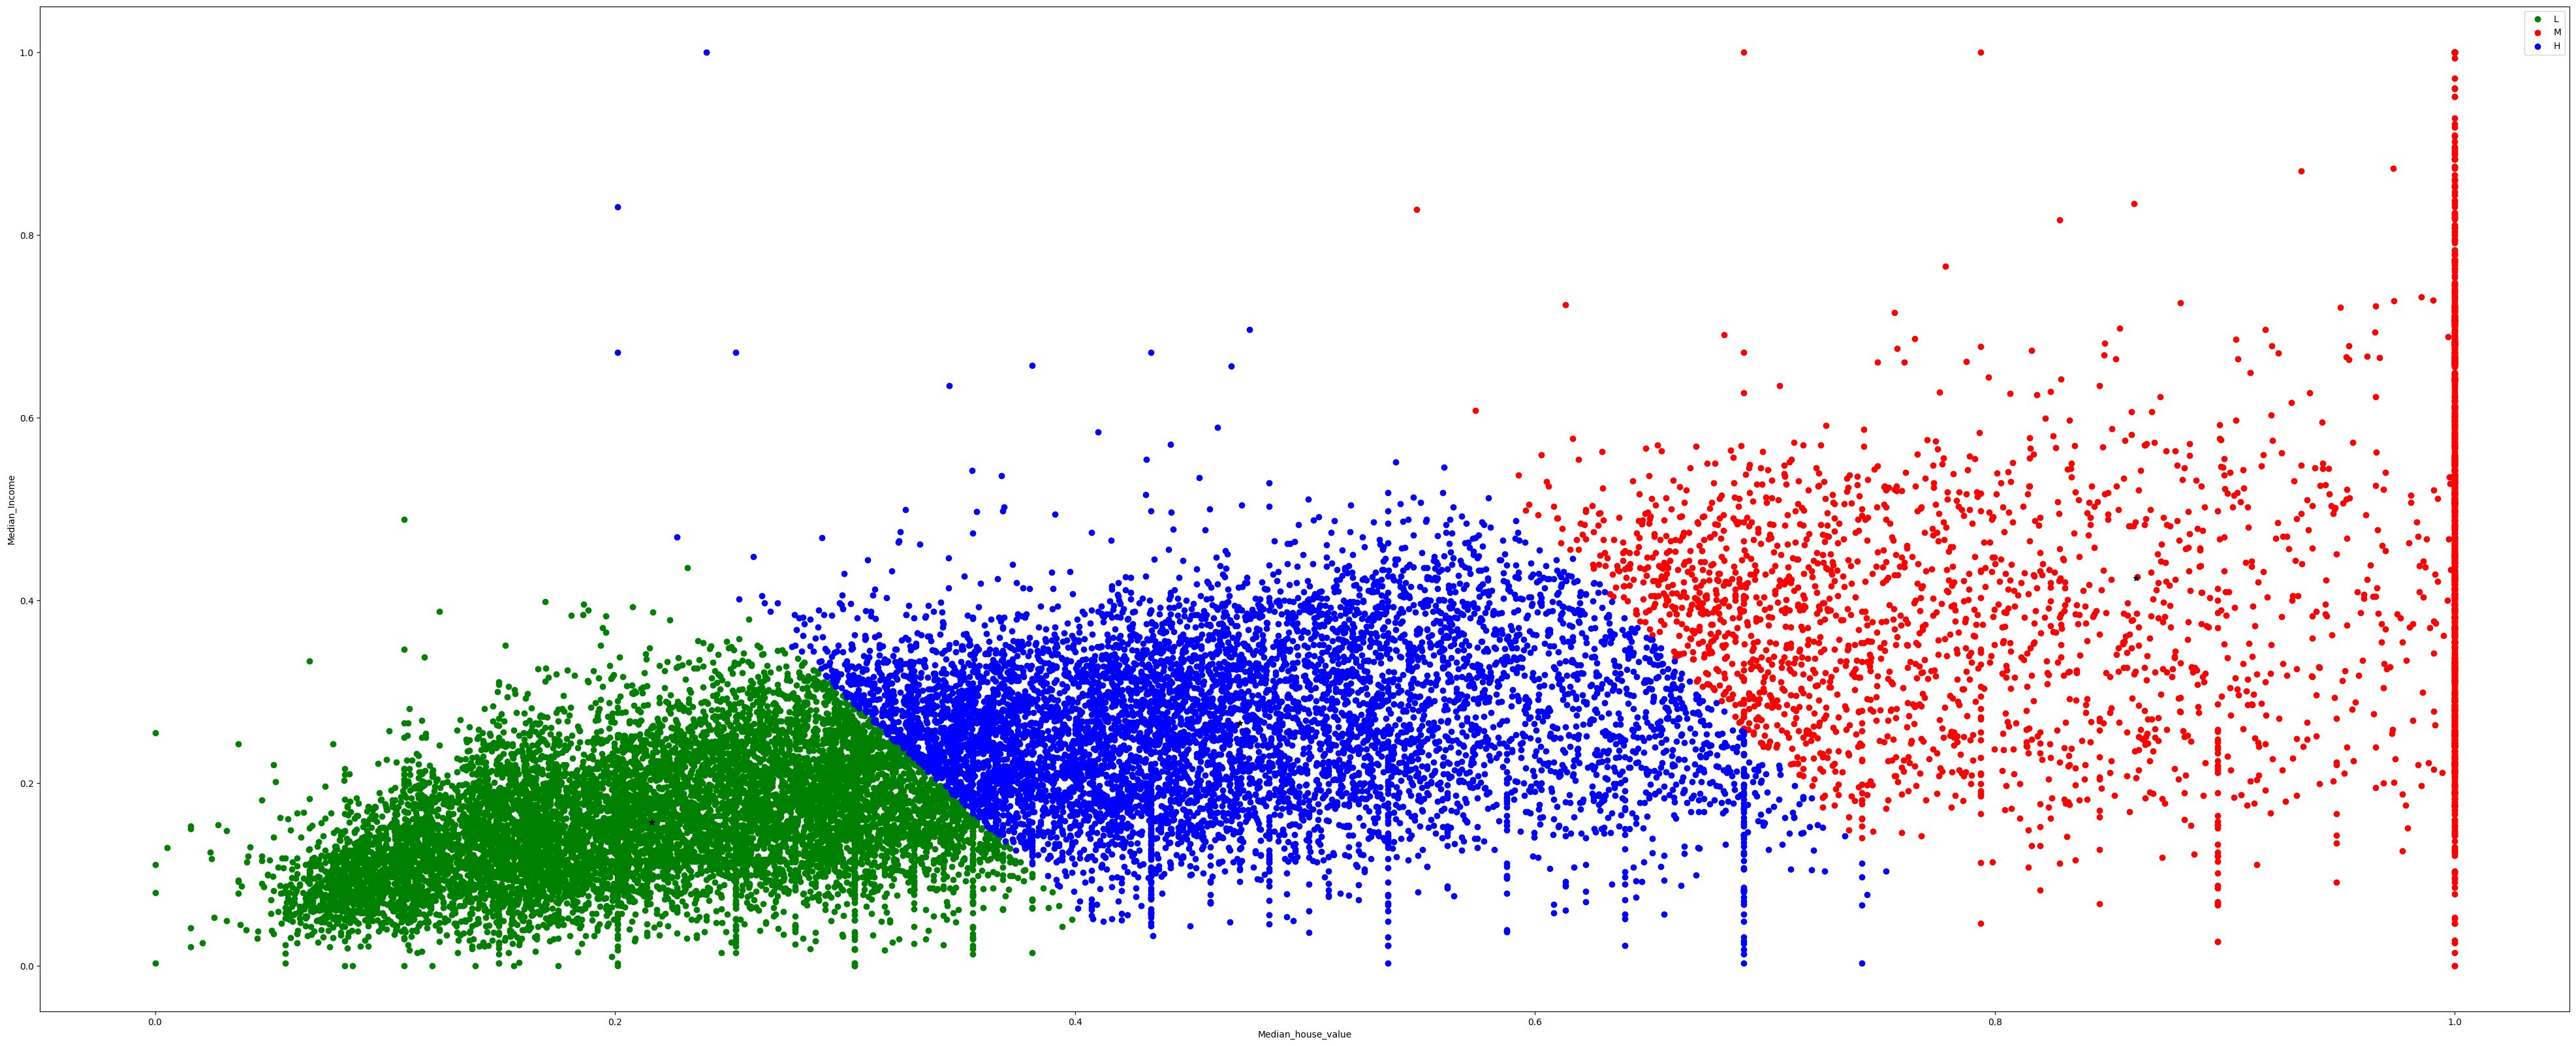

In [776]:
dataframe_1 = new_data[new_data.cluster == 0]
dataframe_2 = new_data[new_data.cluster == 1]
dataframe_3 = new_data[new_data.cluster == 2]

if(Dataframe_path == "database/csv3.csv"):
    plt.figure(figsize= (50, 20))
    plt.scatter(dataframe_1.median_house_value, dataframe_1['median_income'], color='green')
    plt.scatter(dataframe_2.median_house_value, dataframe_2['median_income'], color='red')
    plt.scatter(dataframe_3.median_house_value, dataframe_3['median_income'], color='blue')

    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='Centroid')
    
    plt.xlabel("Median_house_value")
    plt.ylabel("Median_Income")
    plt.legend("LMH")
elif(Dataframe_path == "database/csv2.csv"):
    plt.figure(figsize= (50, 20))
    plt.scatter(dataframe_1.Price, dataframe_1['BuildingArea'], color='green')
    plt.scatter(dataframe_2.Price, dataframe_2['BuildingArea'], color='red')
    plt.scatter(dataframe_3.Price, dataframe_3['BuildingArea'], color='blue')
    
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='Centroid')

    plt.xlabel("Landsize")
    plt.ylabel("Price")
    plt.legend("Price")

<strong>Elbow Plot to find the optimal number of clusters</strong>

In [777]:
km.cluster_centers_

array([[0.4715719 , 0.26573881],
       [0.86149926, 0.423777  ],
       [0.21577684, 0.15715095]])

In [778]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    if(Dataframe_path == "database/csv3.csv"):
        y_predicted = km.fit_predict(new_data[['median_house_value', 'median_income']])
        sse.append(km.inertia_)
    elif(Dataframe_path == "database/csv2.csv"):
        y_predicted = km.fit_predict(new_data[['Price', 'BuildingArea']])
        sse.append(km.inertia_)

In [779]:
sse

[1522.66559073987,
 601.0709897699037,
 366.5864754026356,
 275.64165062149556,
 226.28394945340696,
 188.05173360712865,
 166.31735734619352,
 143.489660749876,
 129.1879855788326]

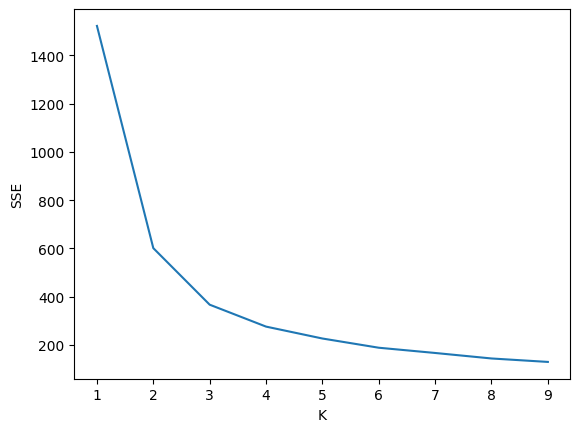

In [780]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)